In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3000)

# Utility functions

In [2]:
def emperical_mgf(X, t):
    if type(t) is not np.ndarray:
        t = np.array([t])
    return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)

def chi_square(n, N=100):
    return np.sum([np.power(np.random.normal(size=(N, )), 2) for _ in range(n)])

def check_sub_gaussianity(X, sigma, max_T=1, nPoints=100, plot=False, m=None, n=None, idx=None):
    t = np.linspace(0, max_T, nPoints)
    
    mgf_X = emperical_mgf(X, t)
    mgf_gau = np.exp(0.5*np.power(sigma*t, 2))
    
    if plot:
        if m is not None and n is not None:
            plt.subplot(m, n, idx)
        else:
            plt.figure(figsize=(10, 8))
        if idx is not None:
            plt.title('n = {}'.format(idx), fontsize=15)
        plt.plot(mgf_X, '-o', markevery=10, fillstyle='none', label=r'$\mathbb{E}\left[e^{\lambda\mathbb{X}}\right]$')
        plt.plot(mgf_gau, '-x', markevery=20, fillstyle='none', label=r'$e^{\frac{\sigma ^2\lambda ^2}{2}}$')
        plt.xlabel(r'$\lambda$', fontsize=15)
        
    if np.all(mgf_X <= mgf_gau):
        print('Follows sub-gaussianity.')
    else:
        print("Doesn't follow sub-gaussianity!!")

def hoeffding_bound(t, b, a):
    return np.exp(-2*np.power(t, 2)/(np.sum(b-a)))

def phi(x):
    return (1+x)*np.log(1+x) - x

def bennett_bound(t, M, sigma_term):
    return np.exp(-1*(sigma_term/np.power(M, 2))*phi(M*t/sigma_term))

def chernoff_bound(t, e, X):
    return np.exp(-1*t*e)*emperical_mgf(X, e)


def get_tail_probability(X, x):
    nSamples = X.shape[0]
    
    return np.sum(X >= x)/nSamples

# Q1

## $\sigma$ = 1000
## Chi square is does not follow sub-gaussianity !!

n = 1 Doesn't follow sub-gaussianity!!
n = 2 Doesn't follow sub-gaussianity!!
n = 3 Doesn't follow sub-gaussianity!!
n = 4 Doesn't follow sub-gaussianity!!
n = 5 Doesn't follow sub-gaussianity!!
n = 6 Doesn't follow sub-gaussianity!!
n = 7 Doesn't follow sub-gaussianity!!
n = 8 Doesn't follow sub-gaussianity!!
n = 9 Doesn't follow sub-gaussianity!!
n = 10 Doesn't follow sub-gaussianity!!


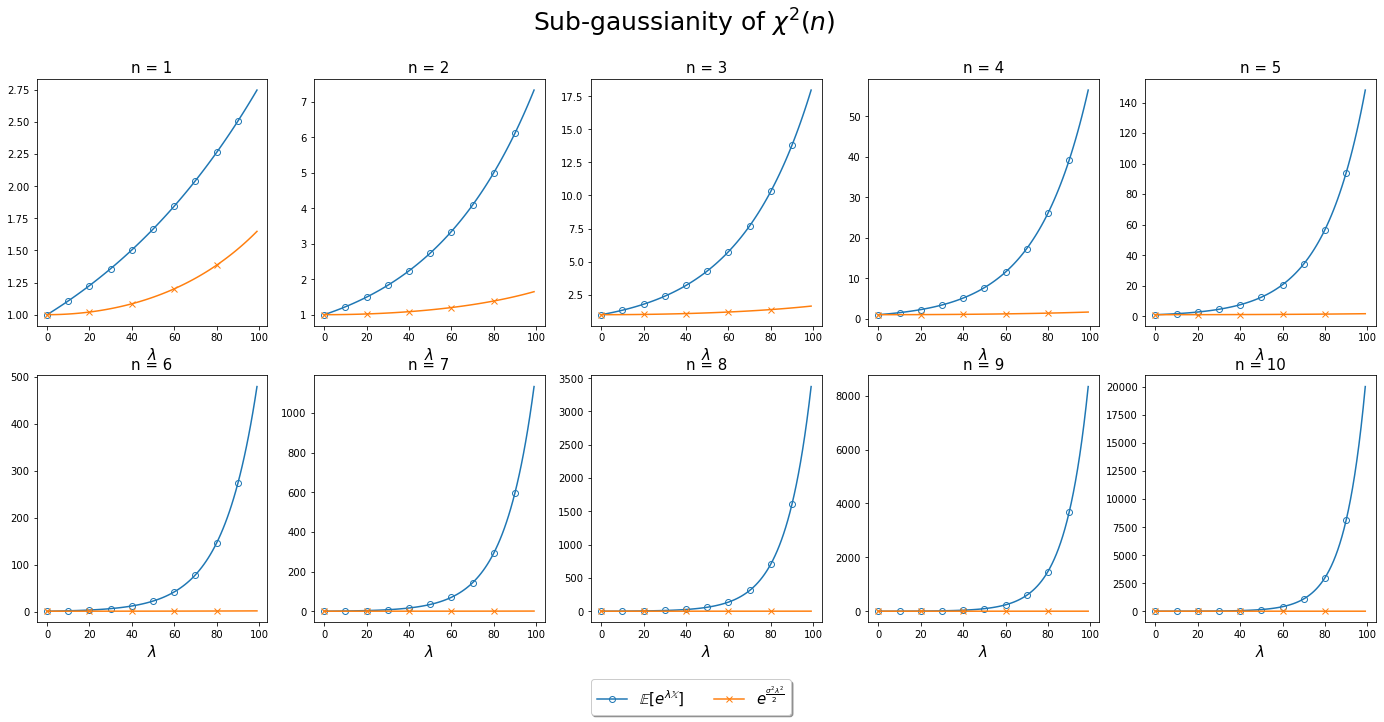

In [3]:
N = 1000
n_max = 10
m_ = 2
n_ = 5

sigma = 1e3


plt.figure(figsize=(24, 10))
plt.suptitle(r'Sub-gaussianity of $\chi ^2(n)$', fontsize=25)
for i in range(1, n_max+1):
    X = chi_square(i, N=N)
    print("n = {}".format(i), end=" ")
    check_sub_gaussianity(X, sigma, plot=True, max_T=1e-3, m=m_, n=n_, idx=i)

plt.legend(loc='upper right', bbox_to_anchor=(-1.5, -0.2),
          fancybox=True, shadow=True, ncol=4, fontsize=15)

# Q2
## $\sigma$ = 1
## Uniform RV is follows sub-gaussianity !!

Uniform random variable Doesn't follow sub-gaussianity!!


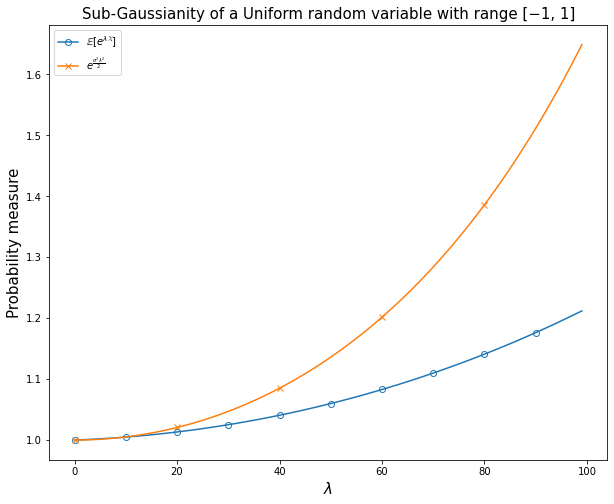

In [4]:
a = 1
sigma = 1

X = np.random.uniform(-1*a, a, size=(N,))
print("Uniform random variable", end=" ")
check_sub_gaussianity(X, sigma, plot=True, max_T=1)
plt.title('Sub-Gaussianity of a Uniform random variable with range [âˆ’{}, {}]'.format(a, a), fontsize=15)
plt.ylabel('Probability measure', fontsize=15)
plt.legend()

## Laplacian does not follow sub-gaussianity !!

Laplace random variable Doesn't follow sub-gaussianity!!


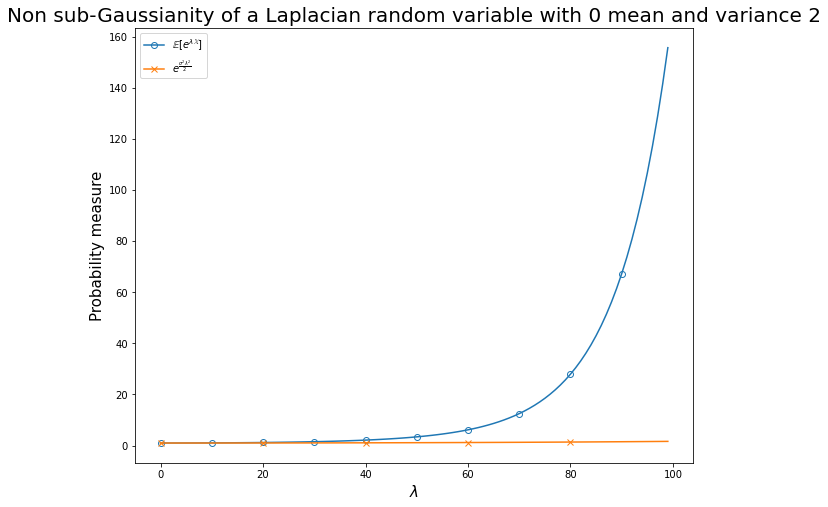

In [5]:
b = 1
sigma = 1

X = np.random.laplace(scale=2*b**2, size=(N,))
print("Laplace random variable", end=" ")
check_sub_gaussianity(X, sigma, plot=True, max_T=1)
plt.title('Non sub-Gaussianity of a Laplacian random variable with 0 mean and variance {}'.format(2*b**2), fontsize=20)
plt.ylabel('Probability measure', fontsize=15)
plt.legend()

# Q3
## [Bennett > Hoeffding > Chernoff ] in tightness 

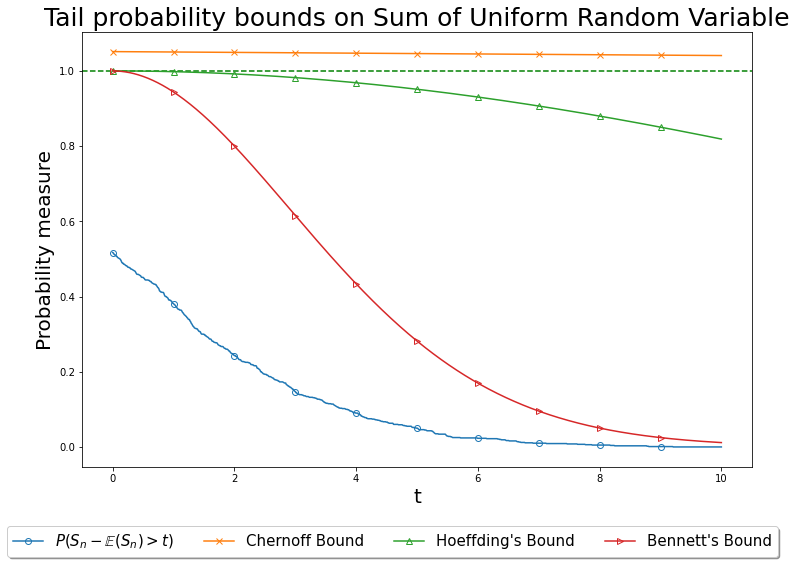

In [6]:
n = 100

X = np.sum(np.random.uniform(size=(N, n)), axis=1)

sigma = 1/2
sigma_term = n/12

b = np.ones((N, ))
a = np.zeros((N, ))

M = 1
mean = n/2

n_t = 1000
t = np.linspace(0, 10, n_t)

h_b = hoeffding_bound(t, b, a)
b_b = bennett_bound(t, M, sigma_term)
e = 1e-3
c_b = chernoff_bound(t, e, X)

t_p = np.array([get_tail_probability(X, mean + t_i) for t_i in t])

plt.figure(figsize=(12, 8))
plt.title('Tail probability bounds on Sum of Uniform Random Variable', fontsize=25)

plt.axhline(1, linestyle='--', color='g')
plt.plot(t, t_p, '-o', markevery=100, fillstyle='none', label=r'$P(S_n - \mathbb{E}(S_n) > t)$')
plt.plot(t, c_b, '-x', markevery=100, fillstyle='none',  label='Chernoff Bound')
plt.plot(t, h_b, '-^', markevery=100, fillstyle='none',  label="Hoeffding's Bound")
plt.plot(t, b_b, '->', markevery=100, fillstyle='none',  label="Bennett's Bound")
plt.ylabel('Probability measure', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, -0.12),
          fancybox=True, shadow=True, ncol=4, fontsize=15)